<b>Project Name</b>: Learning the Code: Patterns in Learning and Career Outcomes

<b>Team Members</b>: Jie Luo, Kittnipatt Buranasiri, Lydia Schrandt

<b>Project Coach</b>: Alexander Levin-koopman

<b><font color='darkblue'>Introduction</font></b>

Welcome to this comprehensive analysis of the **2021 New Coder Survey**. This dataset encompasses responses from over **18,000 individuals** who shared their motivations, learning methods, and career aspirations related to coding.

<b><font color='darkblue'>Dataset Description</font></b>
The  dataset contains 63 columns that capture a wide range of information about individuals learning to code, including:

- <b>Demographic Information</b>: Age, gender identity, geographic location, marital status, and highest level of education completed.
- <b>Learning Motivations and Methods</b>: Reasons for learning to code, methods used (e.g., online courses, books, bootcamps), helpful online resources, and in-person event attendance.
- <b>Career Goals and Employment Status</b>: Current employment in software development, interest in a software development career, preferred job roles, salary expectations, and willingness to relocate.
- <b>Financial Information</b>: Amount spent on learning to code, household debt levels, and current income.
- <b>Job Satisfaction and Employment Dynamics</b>: Satisfaction with various aspects of current employment (e.g., earnings, benefits, job security), job search experience, and job stability.

<b><font color='darkblue'>Objectives 🔍 </font></b>

In this data exploration & analysis, we will:

1. **Get Data General Info**: Obtain an overview of the dataset's structure, including the number of entries, columns, data types, and missing values.
2. **Process the Natural Language-Based Columns and Data Preprocessing**: Transform and extract meaningful features from columns containing natural language data.
3. **Data Cleaning and Preprocessing**: Handle missing values, correct data types, and address any inconsistencies in the dataset.
4. **Feature Engineering**: Create new features that can enhance the performance of our predictive models.
5. **Handling Data Imbalance**: Apply resampling techniques to address class imbalance, ensuring that our models are trained on a balanced dataset.
6. **Exploratory Data Analysis (EDA)**: Visualize and summarize the data to identify patterns and trends.

<b><font color='darkblue'>Getting Started 🚀</font></b>

To embark on our analysis of the 2021 New Coder Survey, we'll begin by acquiring the raw dataset directly from the original GitHub repository. This ensures that we're working with the most recent and unaltered version of the data. We'll utilize Python's pandas library to load the dataset seamlessly into our Google Colab environment.


### <b>Part I. Load the Raw Dataset</b>

In [1]:
### Importing Necessary Libraries
# Data Manipulation
import pandas as pd
import numpy as np
import re

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats

# Display settings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Download the CSV file using wget
!wget -O survey.csv 'https://raw.githubusercontent.com/freeCodeCamp/2021-new-coder-survey/main/2021%20New%20Coder%20Survey.csv'

--2024-09-29 18:45:57--  https://raw.githubusercontent.com/freeCodeCamp/2021-new-coder-survey/main/2021%20New%20Coder%20Survey.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17514831 (17M) [text/plain]
Saving to: ‘survey.csv’

survey.csv          100%[===================>]  16.70M  84.8MB/s    in 0.2s    

2024-09-29 18:45:58 (84.8 MB/s) - ‘survey.csv’ saved [17514831/17514831]



In [3]:
# Load the CSV into a pandas DataFrame
df = pd.read_csv('survey.csv')

# Display the first five rows of the DataFrame
df.head(5)

,Timestamp,1. What is your biggest reason for learning to code?,2. What methods have you used to learn about coding? Please select all that apply.,3. Which online learning resources have you found helpful? Please select all that apply.,"4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.","5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.","6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.",7. About how many hours do you spend learning each week?,8. About how many months have you been programming?,"9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?",...,45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security],45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance],45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities],45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture],45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment],45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload],46. About how many minutes does it take you to get to work each day?,47. Have you served in your country's military before?,48. Do you currently receive disability benefits from your government?,49. Do you have high speed internet at your home?
0,7/1/2021 10:10:23,To succeed in current career,"Online resources, Books, In-person bootcamps, ...","freeCodeCamp, Mozilla Developer Network (MDN),...","conferences, workshops, Meetup.com events",The Changelog,"CS Dojo, freeCodeCamp",4.0,120,NaN,...,Somewhat satisfied,Somewhat dissatisfied,I do not know,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,I work from home,No,No,Yes
1,7/1/2021 10:31:01,To change careers,"Online resources, Books, Online bootcamps","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"The Changelog, Code Newbie Podcast","Adrian Twarog, Code with Ania Kubów, Coder Cod...",10.0,6,30,...,Very dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,15 to 29 minutes,No,Yes,Yes
2,7/1/2021 10:42:31,To change careers,"Online resources, Books, Hackathons, Meetup.co...","freeCodeCamp, Mozilla Developer Network (MDN),...",Meetup.com events,I haven't listened to any podcasts,"AmigosCode, Dev Ed, freeCodeCamp, Kevin Powell...",30.0,48,300,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,I am not working,No,No,Yes
3,7/1/2021 11:06:43,As a hobby,"Online resources, Books","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"Darknet Diaries, Real Python Podcast","freeCodeCamp, Traversy Media",NaN,36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,I am not working,No,No,No
4,7/1/2021 11:14:31,To start your first career,"Online resources, Books, Online bootcamps","freeCodeCamp, Stack Overflow, Coursera, Udemy",I haven't attended any in-person coding-relate...,Talk Python to Me,"freeCodeCamp, The Net Ninja, Traversy Media",2.0,24,5000,...,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,45 to 60 minutes,No,No,Yes


### <b>Part II. Get Data General Info</b>

Let's quickly take a look into the dataset and obtain an overview of the dataset's structure.

In [4]:
# Display the shape of the DataFrame
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display information about data types and non-null counts
df.info()

Dataset contains 18126 rows and 63 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 63 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Timestamp                                                                                                                                                                   18126 non-null  object 
 1   1. What is your biggest reason for learning to code?                                                                                                                        17991 non-null  object 
 2   2. What methods have you used to lear

<font color='darkgreen'><b>Insights</b>:

- From the df.info() output, we could easily see that many of the columns have lengthy and descriptptive names. These long column names, while informative, can hinder readability and efficiency during data manipulation and analysis. Therefore, it would be beneficial to revise and shorten the column names.
- Additionally, there is a noticeable percentage of missing values across many columns. We would need to handling these missing data as it is important to maintain the integrity and reliability of the analysis.</font>

<font color='darkgrey'><i>Note: Given the unique nature of the raw dataset, which includes a significant amount of natural language data, we need to transform many columns into new features or attributes. Later, we will work on handling missing values until after this feature engineering process. Once the dataset has been converted into meaningful features, we will address the missing values accordingly.</i></font>

### <b>Part III. Process the Natural Language-Based Columns and Data  Preprocessing</b>

In this section, we will transform the dataset's extensive natural language data into structured numerical features suitable for analysis and modeling. Additionally, we will perform data preprocessing, a fundamental step in any data analysis project. We will provide detailed explanations for the inclusion or exclusion of specific columns.

To begin, we will need to select the columns that will be part of the final dataset.

- Since the <font color='darkblue'>Timestamp</font> records the date and time when the platform received the survey, it does not relate to the students' learning experiences or outcomes. Therefore, we will exclude it from our analysis.


In [5]:
df = df.drop('Timestamp', axis=1)

The first column, <font color='darkblue'>'1. What is your biggest reason for learning to code?'</font>, captures the motivations behind learning to code, which is essential for our analysis. We intend to include this column in the final dataset. However, the responses are often lengthy and varied, so we will standardize them into shorter, more meaningful categories.

In [6]:
# Get the unique reasons for the intuition
unique_reasons = df['1. What is your biggest reason for learning to code?'].unique()

print(f"There will be {len(unique_reasons)} unique reasons.")
print(unique_reasons[:9])

There will be 795 unique reasons.
['To succeed in current career' 'To change careers' 'As a hobby'
 'To start your first career' 'To start a business or to freelance'
 'To create art or entertainment' nan 'Good question'
 'Have passion in coding']


Since the data contains 795 unique reasons, which is too many for further analysis, we can categorize the diverse responses into a few categories: 'Career', 'Personal Interest or Development', 'Academic Requirements', and 'Others'.

In [7]:
# Define categories and their corresponding keywords
categories = {
    'Career': [
        'career', 'careers', 'career change', 'change career', 'job', 'professional', 'switch career',
        'transition career', 'retrain', 'reenter workforce', 'career path',
        'career shift', 'career options', 'career opportunities', 'career development',
        'freelance', 'freelancing', 'start-up', 'entrepreneurship', 'business'
    ],
    'Personal Interest or Development': [
        'hobby', 'fun', 'personal interest', 'passion', 'enjoy', 'develop',
        'curiosity', 'create art', 'entertainment', 'personal growth', 'learn for fun',
        'love coding', 'challenge myself', 'creative projects', 'build projects', 'solve problems',
        'self-development', 'creative expression', 'personal satisfaction'
    ],
    'Academic Requirements': [
        'school', 'academic', 'education', 'university', 'degree', 'school requirements',
        'college', 'study', 'academic requirements', 'curriculum', 'school project'
    ]
}

# Function to assign categories based on keywords
def assign_categories(response):
    if pd.isnull(response):
        return 'Others'
    response_lower = response.lower()
    assigned = set()
    for category, keywords in categories.items():
        for keyword in keywords:
            # Use word boundaries to avoid partial matches
            if re.search(r'\b' + re.escape(keyword) + r'\b', response_lower):
                assigned.add(category)
                break  # Avoid duplicate category assignment within the same category
    return ', '.join(assigned) if assigned else 'Others'

In [8]:
# Apply the function to map categories
df['Intuition'] = df['1. What is your biggest reason for learning to code?'].apply(assign_categories)

# Drop the original column
df = df.drop('1. What is your biggest reason for learning to code?', axis=1)

For the second and third columns, '<font color='darkblue'>2. What methods have you used to learn about coding? Please select all that apply,</font>' and '<font color='darkblue'>3. Which online learning resources have you found helpful? Please select all that apply,</font>' we aim to capture the various methods and online resources individuals have used to learn coding. These selections can also reflect the learners' level of effort and proactive mindset. We plan to transform these variables by counting the number of unique methods and online learning resources selected in each of these two columns.

In [9]:
def count_unique_entries(entry):
    if pd.isnull(entry) or not isinstance(entry, str):
        return 0
    # Split by comma, strip whitespace, convert to lowercase to ensure uniqueness
    items = [item.strip().lower() for item in entry.split(',') if item.strip()]
    return len(set(items))

# Count unique learning methods
df['Count_Learning_Methods'] = df['2. What methods have you used to learn about coding? Please select all that apply.'].apply(count_unique_entries)

# Count unique helpful resources
df['Count_Online_Resources'] = df['3. Which online learning resources have you found helpful? Please select all that apply.'].apply(count_unique_entries)

In [10]:
# Drop the original column
df = df.drop('2. What methods have you used to learn about coding? Please select all that apply.', axis=1)
df = df.drop('3. Which online learning resources have you found helpful? Please select all that apply.', axis=1)

For the column '<font color='darkblue'>4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.</font>', it would be interesting to later examine whether attending in-person coding-related events contributes to successful learning. We could convert this column into a boolean variable.

In [11]:
def create_boolean_column(entry):
    if pd.isnull(entry):
        return False
    entry_lower = entry.strip().lower()
    if entry_lower.startswith("i haven't") or entry_lower.startswith("i have not"):
        return 0
    else:
        return 1

# Rename the column for simplicity
df.rename(columns={
    '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.': 'Attended_In_Person_Events'
}, inplace=True)

# Apply the function to create 'In-person Events' column
df['In-person Events'] = df['Attended_In_Person_Events'].apply(create_boolean_column)

# Drop the original column
df = df.drop('Attended_In_Person_Events', axis=1)

Similar with the column of 'Attended_In_Person_Events', we could also convert the column <font color='darkblue'>'5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.'</font> as a boolean column.

In [12]:
# Rename the column for simplicity
df.rename(columns={
    '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.': 'Podcasts'}, inplace=True)

# Apply the function to create 'In-person Events' column
df['Listen_Podcasts'] = df['Podcasts'].apply(create_boolean_column)

# Drop the original column
df = df.drop('Podcasts', axis=1)

For the column <font color='darkblue'>'6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.'</font>, which records the various YouTube channels users have watched, we could convert it into a count of unique YouTube channels per user since we are not planning to analyze the specific details of these channels.

In [13]:
# Rename the column
df.rename(columns={
    '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.': 'Youtube'
}, inplace=True)

# Count unique learning methods
df['Youtube_Channels'] = df['Youtube'].apply(count_unique_entries)

# Drop the original column
df = df.drop('Youtube', axis=1)

For the columns <font color='darkblue'>'7. About how many hours do you spend learning each week?', '8. About how many months have you been programming?', and '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?'</font>, which contain either numerical data or boolean values, we will simply rename these complex column names for now.

In [14]:
# Rename the columns
df.rename(columns={
    '7. About how many hours do you spend learning each week?': 'Hours_Learning_Weekly',
    '8. About how many months have you been programming?': 'Months_Programming',
    '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?': 'Money_Spent'
}, inplace=True)

For the columns <font color='darkblue'>'10. Are you already employed in a software development job?'</font> and <font color='darkblue'>'11. If you are already employed as a developer, is this your first software development job?'</font>, which ask similar questions, we can consolidate them into a single boolean column. This new column will indicate whether the person has industry software development experience. If a respondent is employed as a developer, the column will reflect their experience status; otherwise, it will be marked as False, rendering the second question unnecessary.

In [15]:
# Rename the columns
df.rename(columns={
    '10. Are you already employed in a software development job?': 'Industry_Experience'
}, inplace=True)

# Drop the duplicate column
df = df.drop('11. If you are already employed as a developer, is this your first software development job? ', axis=1)

Since nearly everyone is interested in a software development career, they would not choose to learn coding otherwise. Therefore, the column <font color='darkblue'>'12. If you are NOT already a developer, are you interested in a software development career?</font>' appears redundant and will be dropped.

In [16]:
# Drop the duplicate column
df = df.drop('12. If you are NOT already a developer, are you interested in a software development career?', axis=1)

Since our goal is to predict 1. individuals' job status across high-income, low-income, and no-job categories; 2. high or low expectations for both employed and unemployed individuals, the column <font color='darkblue'>'13. If you are interested in a software development career, would you prefer to...', '14. Which of these careers are you interested in?'</font> and <font color='darkblue'>'15. When do you plan to start applying for developer jobs?'</font> provide limited value for study recommendations and will therefore be dropped.

In [17]:
# List of columns to drop
columns_to_drop = [
    '13. If you are interested in a software development career, would you prefer to...',
    '14. Which of these careers are you interested in?',
    '15. When do you plan to start applying for developer jobs?'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

For Objective 2, which aims to predict job status based on high or low expectations, we will convert the column <font color='darkblue'>'16. About how much money do you expect to earn per year at your first developer job (in US Dollars)?'</font> into a boolean column named 'High_Expectation'.

In [18]:
# Rename the column for simplicity
df.rename(columns={
    '16. About how much money do you expect to earn per year at your first developer job (in US Dollars)? ': 'Expected_Earnings'
}, inplace=True)

# Define the function to determine high expectation
def determine_high_expectation(entry):
    if pd.isnull(entry) or entry.strip() == "":
        return 0
    try:
        # Extract the lower bound from the earnings range
        lower_bound_str = entry.split(' to ')[0].replace('$', '').replace(',', '').strip()
        lower_bound = int(lower_bound_str)
        return 1 if lower_bound >= 10000 else 0
    except (IndexError, ValueError):
        # If the format is unexpected, set to False
        return 0

# Apply the function to create 'High_Expectation' column
df['High_Expectation'] = df['Expected_Earnings'].apply(determine_high_expectation)

# Drop the duplicate column
df = df.drop('Expected_Earnings', axis=1)

We will also drop the columns <font color='darkblue'>'17. Please select up to 3 reasons why you are interested in a software development career', '18. After the pandemic, how many days would you ideally like to work from home versus in an office each week?'</font>, and <font color='darkblue'>'19. Are you willing to relocate for a job?'</font>, as these columns do not provide factual information but rather reflect each individual's willingness.

In [19]:
# List of columns to drop
columns_to_drop = [
    '17. Please select up to 3 reasons why you are interested in a software development career',
    '18. After the pandemic, how many days would you ideally like to work from home versus in an office each week?',
    '19. Are you willing to relocate for a job?'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

The column <font color='darkblue'>'20. Regarding employment status, are you currently....'</font> is essential for our two objectives, which focus on job status. We will categorize the information into two statuses: unemployed and employed.

In [20]:
# Define the function to determine employment status
def map_employment_status(entry):
    if pd.isnull(entry) or entry.strip() == "":
        return 0
    entry_lower = entry.lower()
    if 'full-time' in entry_lower or 'part-time' in entry_lower or 'self-employed' in entry_lower:
        return 1
    else:
        return 0

# Apply the function to create 'Employment_Status' column
df['Employment_Status'] = df['20. Regarding employment status, are you currently.... '].apply(map_employment_status)

# Drop the original column
df = df.drop('20. Regarding employment status, are you currently.... ', axis=1)

For the column <font color='darkblue'>'21. If you are currently working, which field do you work in?'</font>, since the current work field may influence individuals' expectations and income from the previous year, we will include this column and standardize its content.

In [21]:
# Rename the column for simplicity
df.rename(columns={
    '21. If you are currently working, which field do you work in?': 'Field_Working'
}, inplace=True)

# Define a mapping function to categorize fields
def categorize_field(entry):
    if pd.isnull(entry) or entry.strip() == "":
        return 'unemployed'

    entry_lower = entry.lower()

    if entry_lower == 'software development and it':
        return 'Software development and IT'
    elif entry_lower == 'education':
        return 'Education'
    elif 'self-employ' in entry_lower:
        return 'Self-employed'
    elif entry_lower == 'i am not currently working':
        return 'unemployed'
    else:
        return 'Others'

df['Field_Working'] = df['Field_Working'].apply(categorize_field)

For Objective 1, which aims to predict job status across high-income, low-income or no-job categories, we will convert the column <font color='darkblue'>'22. About how much money did you earn last year from any job or employment (in US Dollars)?'</font> into a boolean column named 'Income'.

The goal is to map each entry to a numerical value based on the following criteria:

*   0: If the entry is 'None' or a null value.
*   1: If the earnings are $10,000 or less.

*   2: If the earnings are over $10,000.

In [22]:
# Rename the column for simplicity
df.rename(columns={
    '22. About how much money did you earn last year from any job or employment (in US Dollars)? ': 'Income'
}, inplace=True)

# Define the function to determine high expectation
def determine_income(entry):
    if pd.isnull(entry) or entry.strip().lower() == 'none':
        return 0
    entry_lower = entry.lower()
    if 'under' in entry_lower:
        # Entries like 'Under $1,000' are considered <= $10,000
        return 1
    else:
        try:
            # Extract the lower bound of the earnings range
            lower_bound_str = entry.split(' to ')[0].replace('$', '').replace(',', '').strip()
            lower_bound = int(lower_bound_str)
            if lower_bound <= 10000:
                return 1
            else:
                return 2
        except (IndexError, ValueError):
            # If the format is unexpected, default to 0
            return 0

# Apply the function to create 'High_Expectation' column
df['Income'] = df['Income'].apply(determine_income)

We will retain the column <font color='darkblue'>'23. How old are you?'</font> as age may influence user behavior. However, we will simplify the column name to 'Age'.

In [23]:
# Rename the column for simplicity
df.rename(columns={
    '23. How old are you?': 'Age'
}, inplace=True)

For ethical reasons, we do not wish to differentiate individuals based on their race, gender, place of residence, or other related attributes. Therefore, we will drop the corresponding columns:

* <font color='darkblue'>24. Which of the following best represents how you think of yourself?
* <font color='darkblue'>25. With which of these groups do you primarily identify?
* <font color='darkblue'>26. Which part of the world do you live in?
* <font color='darkblue'>27. If you are living in the US, which state do you currently live in?
* <font color='darkblue'>28. About how many people live in your city?
* <font color='darkblue'>29. Is your country of citizenship different from the country where you live?
* <font color='darkblue'>30. Are you an ethnic minority in your country?

In [24]:
# List of columns to drop
columns_to_drop = [
    '24. Which of the following best represents how you think of yourself?',
    '25. With which of these groups do you primarily identify?',
    '26. Which part of the world do you live in?',
    '27. If you are living in the US, which state do you currently live in? ',
    '28. About how many people live in your city?',
    '29. Is your country of citizenship different from the country where you live?',
    '30. Are you an ethnic minority in your country?',
    '31. Is English your second language?',
    '48. Do you currently receive disability benefits from your government?'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

Since the highest degree can reflect an individual's educational background and professional qualifications, we will simplify the column <font color='darkblue'>'32. What is the highest degree or level of school you have completed?'</font> and standardize its content.

In [25]:
# Rename the column for simplicity
df.rename(columns={
    '32. What is the highest degree or level of school you have completed?': 'Highest_Degree'
}, inplace=True)

# Define the mapping function
def map_highest_degree(entry):
    if pd.isnull(entry) or entry.strip().lower() in ['none', 'no high school (secondary school)']:
        return 'Others'

    entry_lower = entry.lower()

    # Exact matches to keep as is
    exact_matches = [
        'professional degree (mba, md, jd, etc.)',
        'ph.d.',
        'associate’s degree'
    ]
    if entry_lower in exact_matches:
        return entry  # Keep as is

    # Partial matches
    if 'bachelor' in entry_lower:
        return 'Bachelor’s degree'
    elif "master's degree" in entry_lower:
        return "Master's degree"
    elif 'high school' in entry_lower or 'some college credit, no degree' in entry_lower:
        return 'High school'
    else:
        return 'Others'

# Apply the mapping function to create a new column
df['Highest_Degree'] = df['Highest_Degree'].apply(map_highest_degree)


Since an individual's major can influence career outcomes, we will use the column <font color='darkblue'>'48. Do you currently receive disability benefits from your government?'</font> to categorize it as 'Computer-related', 'Other Science & Engineering', 'Others', or 'Not applicable' if the individual did not attend a university.

In [26]:
# Define the function to categorize the study field
def categorize_study_field(entry):
    if pd.isnull(entry) or entry in ["I didn't attend a university", "Undecided or no major"]:
        return 'Not applicable'
    elif entry == 'Computer science, computer engineering, or software engineering':
        return 'Computer-related'
    elif any(word in entry.lower() for word in ['science', 'statistics', 'mathematics', 'engineering']):
        return 'Other Science & Engineering'
    else:
        return 'Others'

# Apply the function to create the categorized column
df['Study_Field'] = df['33. If you attended a university, what did you study?'].apply(categorize_study_field)

# Drop the original column
df = df.drop('33. If you attended a university, what did you study?', axis=1)

The column <font color='darkblue'>'34. Are you currently a student attending or enrolled in regular school, such as elementary, middle, high school, college, or graduate school?'</font> does not provide significant information, so we will drop it.

In [27]:
# Drop the original column
df = df.drop('34. Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?', axis=1)

We also want to exclude the columns related to each individual's family status, dependents, household debt, and student loans, as our primary focus is on the relationship between learning and career outcomes. While these factors may influence an individual's attitude and personal situation, they will be excluded from our study.

In [28]:
# List of columns to drop
columns_to_drop = [
    '35. What\'s your marital status?',
    '36. How many children do you have? By children, we mean any biological, step, or adopted children.',
    '37. Do you financially support any dependents, older relatives or relatives with disabilities?',
    '38. Do you think you have enough savings to survive for 3 months with no income?',
    '39. How much debt does your household have? [Car loans]',
    '39. How much debt does your household have? [Credit Cards]',
    '39. How much debt does your household have? [Medical Loans]',
    '39. How much debt does your household have? [Mortgages]',
    '39. How much debt does your household have? [Payday Loans]',
    '39. How much debt does your household have? [Student Loans]',
    '39. How much debt does your household have? [Other]'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

The column <font color='darkblue'>'40. How long have you been working in your current job?'</font> may appear useful, but it only reflects the time spent in the current job. For instance, someone might have been in this job for just three months but already possess 10 years of experience. Since this data could misrepresent a person's overall background, we will drop it.

In [29]:
# Drop the original column
df = df.drop('40. How long have you been working in your current job?', axis=1)

We will retain the columns <font color='darkblue'>'41. Before you got your last job, how many months did you spend looking for a job?', '42. If you are working, thinking about the next 12 months, how likely do you think it is that you will lose your job or be laid off?'</font>, and <font color='darkblue'>'43. If you are working, how easy would it be for you to find a job with another employer with approximately the same income and fringe benefits you now have?'<.font>, as they provide insights into each individual's current job situation and self-evaluation. However, we will simplify the column names.

In [30]:
# Rename the columns
df.rename(columns={
    '41. Before you got your last job, how many months did you spend looking for a job?': 'Months_Finding_New_Job',
    '42. If you are working, thinking about the next 12 months, how likely do you think it is that you will lose your job or be laid off?  ': 'Laid_Off_Potential',
    '43. If you are working, how easy would it be for you to find a job with another employer with approximately the same income and fringe benefits you now have? ': 'Replacable_Job_Potential'
}, inplace=True)

For the remaining columns, we will drop all of them for the following reasons:

* 1. Column <font color='darkblue'>44</font> is based on personal feelings, which may not reflect actual facts.
* 2. Column <font color='darkblue'>45s</font> contain satisfaction responses that also reflect personal feelings, which could result from mismatches or personal preferences.
* 3. Columns <font color='darkblue'>'46. About how many minutes does it take you to get to work each day?', '47. Have you served in your country's military before?'</font>, and <font color='darkblue'>'49. Do you have high-speed internet at your home?'</font> are likely to have limited influence on an individual's learning efforts.

In [31]:
# List of columns to drop
columns_to_drop = [
    '44. Do you consider yourself under-employed? (Under-employment means working a job that is below your education level.)',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Earnings]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Benefits]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment]',
    '45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload]',
    '46. About how many minutes does it take you to get to work each day?',
    "47. Have you served in your country's military before?",
    '49. Do you have high speed internet at your home?'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

After processing all the columns, let's review and display the updated dataset.

In [32]:
# Display the shape of the DataFrame
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display information about data types and non-null counts
df.info()

Dataset contains 18126 rows and 20 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hours_Learning_Weekly     16603 non-null  float64
 1   Months_Programming        16695 non-null  object 
 2   Money_Spent               16153 non-null  object 
 3   Industry_Experience       17673 non-null  object 
 4   Field_Working             18126 non-null  object 
 5   Income                    18126 non-null  int64  
 6   Age                       17103 non-null  float64
 7   Highest_Degree            18126 non-null  object 
 8   Months_Finding_New_Job    12352 non-null  float64
 9   Laid_Off_Potential        10989 non-null  float64
 10  Replacable_Job_Potential  10914 non-null  float64
 11  Intuition                 18126 non-null  object 
 12  Count_Learning_Methods    18126 non-null  int64  
 13  Count_Online_Res

### **Part IV. Data Cleaning and Preprocessing**

In this section, we will handle missing values, correct data types, and address any inconsistencies in the dataset. These steps ensure that the data is accurate, consistent, and suitable for analysis and modeling.

<b>Let's begin by reviewing the current dataset once more.</b>

In [33]:
df.head(3)

,Hours_Learning_Weekly,Months_Programming,Money_Spent,Industry_Experience,Field_Working,Income,Age,Highest_Degree,Months_Finding_New_Job,Laid_Off_Potential,Replacable_Job_Potential,Intuition,Count_Learning_Methods,Count_Online_Resources,In-person Events,Listen_Podcasts,Youtube_Channels,High_Expectation,Employment_Status,Study_Field
0,4.0,120,NaN,Yes,Software development and IT,0,33.0,"Professional degree (MBA, MD, JD, etc.)",1.0,1.0,9.0,Career,7,4,1,1,2,0,1,Computer-related
1,10.0,6,30,No,Others,1,38.0,Bachelor’s degree,3.0,5.0,4.0,Career,3,9,0,1,10,1,1,Other Science & Engineering
2,30.0,48,300,No,unemployed,0,NaN,Master's degree,24.0,NaN,NaN,Career,5,6,1,0,5,1,0,Others


<b>Check null values for all columns in dataset.</b>

In [34]:
# Check the number of null values in each column
null_values = df.isnull().sum()

# Display the columns with their corresponding null value counts
print(null_values)

Hours_Learning_Weekly       1523
Months_Programming          1431
Money_Spent                 1973
Industry_Experience          453
Field_Working                  0
Income                         0
Age                         1023
Highest_Degree                 0
Months_Finding_New_Job      5774
Laid_Off_Potential          7137
Replacable_Job_Potential    7212
Intuition                      0
Count_Learning_Methods         0
Count_Online_Resources         0
In-person Events               0
Listen_Podcasts                0
Youtube_Channels               0
High_Expectation               0
Employment_Status              0
Study_Field                    0
dtype: int64


<b>Insight</b>:

* <b>Hours Learning Weekly</b>: If the survey response does not include hours spent learning weekly, we can infer that the individual may not be dedicating much time to it. However, since they participated in the survey, we will fill the missing value with 1, indicating 1 hour or less.

* <b>Months Programming</b>: If the months of programming experience are missing, we assume the individual is just starting and will fill the missing value with 0, indicating less than 1 month of experience.

* <b>Money Spent</b>: If the money spent on learning is missing, we will assume no financial investment has been made and fill the value with 0.

* <b>Industry Experience</b>: If industry experience is missing, we will assume the individual does not have any experience in the industry and fill it with "No."

* <b>Age</b>: If the age is missing, it’s difficult to make an accurate guess, so we will set the value to 0 as a flag indicating the data is missing, while retaining the record.

* <b>Months Finding New Job</b>: If this field is missing, we assume the individual is uncertain about their job search, and we will replace the missing value with 24, which could be a reasonable enough period to find a new job.

* <b>Laid-Off Potential</b>: If the individual did not provide input here, we will assume they are confident they will not be laid off and fill the value with 0.

* <b>Replaceable Job Potential</b>: If this field is left blank, we will assume the individual lacks confidence in securing a similar job and will replace the missing value with the maximum number.



In [35]:
# Fill missing values for 'Hours_Learning_Weekly' with 1 (less or equal to 1 hour)
df['Hours_Learning_Weekly'].fillna(1, inplace=True)

# Fill missing values for 'Months_Programming' with 0 (less than 1 month)
df['Months_Programming'].fillna(0, inplace=True)

# Fill missing values for 'Money_Spent' with 0
df['Money_Spent'].fillna(0, inplace=True)

# Fill missing values for 'Industry_Experience' with 'No'
df['Industry_Experience'].fillna('No', inplace=True)

# Fill missing values for 'Age' with 0 to flag missing data
df['Age'].fillna(0, inplace=True)

# Fill missing values for 'Months_Finding_New_Job' with the maximum value of that column
df['Months_Finding_New_Job'].fillna(24, inplace=True)

# Fill missing values for 'Laid_Off_Potential' with 0 (assume confident, no chance of layoff)
df['Laid_Off_Potential'].fillna(0, inplace=True)

# Fill missing values for 'Replacable_Job_Potential' with the maximum value of that column
max_replacable_job_potential = df['Replacable_Job_Potential'].max()
df['Replacable_Job_Potential'].fillna(max_replacable_job_potential, inplace=True)


<b>After addressing the missing values, let's review the dataset again.</b>

In [36]:
df.head(3)

,Hours_Learning_Weekly,Months_Programming,Money_Spent,Industry_Experience,Field_Working,Income,Age,Highest_Degree,Months_Finding_New_Job,Laid_Off_Potential,Replacable_Job_Potential,Intuition,Count_Learning_Methods,Count_Online_Resources,In-person Events,Listen_Podcasts,Youtube_Channels,High_Expectation,Employment_Status,Study_Field
0,4.0,120,0,Yes,Software development and IT,0,33.0,"Professional degree (MBA, MD, JD, etc.)",1.0,1.0,9.0,Career,7,4,1,1,2,0,1,Computer-related
1,10.0,6,30,No,Others,1,38.0,Bachelor’s degree,3.0,5.0,4.0,Career,3,9,0,1,10,1,1,Other Science & Engineering
2,30.0,48,300,No,unemployed,0,0.0,Master's degree,24.0,0.0,10.0,Career,5,6,1,0,5,1,0,Others


In [37]:
# Check the number of null values in each column
null_values = df.isnull().sum()

# Display the columns with their corresponding null value counts
print(null_values)

Hours_Learning_Weekly       0
Months_Programming          0
Money_Spent                 0
Industry_Experience         0
Field_Working               0
Income                      0
Age                         0
Highest_Degree              0
Months_Finding_New_Job      0
Laid_Off_Potential          0
Replacable_Job_Potential    0
Intuition                   0
Count_Learning_Methods      0
Count_Online_Resources      0
In-person Events            0
Listen_Podcasts             0
Youtube_Channels            0
High_Expectation            0
Employment_Status           0
Study_Field                 0
dtype: int64


<font color='darkblue'>Now, we don't have any missing values anymore!</font>

<b>Next step, let's check the data type.</b>

In [38]:
# Get a summary of the DataFrame including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hours_Learning_Weekly     18126 non-null  float64
 1   Months_Programming        18126 non-null  object 
 2   Money_Spent               18126 non-null  object 
 3   Industry_Experience       18126 non-null  object 
 4   Field_Working             18126 non-null  object 
 5   Income                    18126 non-null  int64  
 6   Age                       18126 non-null  float64
 7   Highest_Degree            18126 non-null  object 
 8   Months_Finding_New_Job    18126 non-null  float64
 9   Laid_Off_Potential        18126 non-null  float64
 10  Replacable_Job_Potential  18126 non-null  float64
 11  Intuition                 18126 non-null  object 
 12  Count_Learning_Methods    18126 non-null  int64  
 13  Count_Online_Resources    18126 non-null  int64  
 14  In-per

<b>With the current data types, we could do:</b>

* Convert the numerical columns (Hours_Learning_Weekly, Age, Months_Finding_New_Job, Laid_Off_Potential, Replacable_Job_Potential) to int typ and (Money_Spen, Months_Programming) to float.
* Convert Income, High_Expectation, and Employment_Status to category type.
* Convert Industry_Experience to 0/1 and then convert it to category type.

In [39]:
# Convert specific columns to 'int' data type
df['Hours_Learning_Weekly'] = df['Hours_Learning_Weekly'].astype(int)
#df['Months_Programming'] = df['Months_Programming'].astype(int)
#df['Money_Spent'] = df['Money_Spent'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Months_Finding_New_Job'] = df['Months_Finding_New_Job'].astype(int)
df['Laid_Off_Potential'] = df['Laid_Off_Potential'].astype(int)
df['Replacable_Job_Potential'] = df['Replacable_Job_Potential'].astype(int)

# Convert specific columns to 'category' data type
df['Income'] = df['Income'].astype('category')
df['High_Expectation'] = df['High_Expectation'].astype('category')
df['Employment_Status'] = df['Employment_Status'].astype('category')

# Convert 'Industry_Experience' from Yes/No to 0/1 and then to 'category'
df['Industry_Experience'] = df['Industry_Experience'].map({'Yes': 1, 'No': 0}).astype('category')

<b>There shows an error when handle the columns 'Months_Programming' and 'Money_Spent', let's see if any outliers within the columns.</b>

In [40]:
#df['Months_Programming'].unique()

# As the output is a little bit long, please uncomment the above row if you want to see the results.

In [41]:
#df['Money_Spent'].unique()

# As the output is a little bit long, please uncomment the above row if you want to see the results.

<b>This should be an outlier, let's remove this one and replace with the highest one we could see in the unique values.</b>

In [42]:
# Remove rows where 'Money_Spent' contains the specific invalid value as a string
df = df[df['Money_Spent'] != '99999999999999999999888889999999999999999999999999999998888888888888888888888888999988889898888898888888888888889988888888']

df['Money_Spent'] = df['Money_Spent'].astype(float)

In [43]:
# Remove rows where 'Money_Spent' contains the specific invalid value as a string
df = df[df['Months_Programming'] != '99999999999999999999999999999999999999999']

df['Months_Programming'] = df['Months_Programming'].astype(float)


<b>After addressing the data type, let's review the dataset again.</b>

In [44]:
df.head(3)

,Hours_Learning_Weekly,Months_Programming,Money_Spent,Industry_Experience,Field_Working,Income,Age,Highest_Degree,Months_Finding_New_Job,Laid_Off_Potential,Replacable_Job_Potential,Intuition,Count_Learning_Methods,Count_Online_Resources,In-person Events,Listen_Podcasts,Youtube_Channels,High_Expectation,Employment_Status,Study_Field
0,4,120.0,0.0,1,Software development and IT,0,33,"Professional degree (MBA, MD, JD, etc.)",1,1,9,Career,7,4,1,1,2,0,1,Computer-related
1,10,6.0,30.0,0,Others,1,38,Bachelor’s degree,3,5,4,Career,3,9,0,1,10,1,1,Other Science & Engineering
2,30,48.0,300.0,0,unemployed,0,0,Master's degree,24,0,10,Career,5,6,1,0,5,1,0,Others


In [45]:
# Get a summary of the DataFrame including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18124 entries, 0 to 18125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Hours_Learning_Weekly     18124 non-null  int64   
 1   Months_Programming        18124 non-null  float64 
 2   Money_Spent               18124 non-null  float64 
 3   Industry_Experience       18124 non-null  category
 4   Field_Working             18124 non-null  object  
 5   Income                    18124 non-null  category
 6   Age                       18124 non-null  int64   
 7   Highest_Degree            18124 non-null  object  
 8   Months_Finding_New_Job    18124 non-null  int64   
 9   Laid_Off_Potential        18124 non-null  int64   
 10  Replacable_Job_Potential  18124 non-null  int64   
 11  Intuition                 18124 non-null  object  
 12  Count_Learning_Methods    18124 non-null  int64   
 13  Count_Online_Resources    18124 non-null  int64   


Now, we have successfully cleaned and preprocessed the dataset, leaving us with a total of <font color='darkblue'><b>20 well-structured columns ready for analysis.</b></font>

### **Part V. Feature Engineering**

In this section, we will create new features to support our multi-class predictive objectives, including generating the target column and applying one-hot encoding for categorical columns.

For <font color='darkblue'><b>Objective 2</b></font>, we would like to perform multi-class prediction of job status based on high or low expectations for both employed and unemployed individuals, helping to reveal career satisfaction and aspirations.

<font color='darkblue'><b>Combines Employment_Status and Income into 3 classes</b></font>:

0. Employed_High_Income: Employed with high income.
1. Employed_Low_Income: Employed with low income.
2. Unemployed with income: Unemployed with income
3. Unemployed with no income: Unemployed with no income

In [46]:
# Objective 1: Combine 'Employment_Status' and 'Income'
def combine_employment_and_income(emp_status, income):
    if emp_status == 1 and income == 2:
        return 0 #'Employed_High_Income'
    elif emp_status == 1 and income == 1:
        return 1 #'Employed_Low_Income'
    elif emp_status == 0 and income != 0:
        return 2 #'Unemployed_Income'
    else:
        return 3 #'Unemployed_No_Income'

# Create new column 'Objective_1_Status' for Objective 1
df['Job_Status_Income(Objective1)'] = df.apply(lambda row: combine_employment_and_income(row['Employment_Status'], row['Income']), axis=1)

For <font color='darkblue'><b>Objective 2</b></font>, we would like to perform multi-class prediction of job status across high-income, low-income or no-job categories to uncover insights about economic positioning and opportunities.

<font color='darkblue'><b>Combines Employment_Status and High_Expectation into 3 classes</b></font>:

1. Employed_High_Expectation: Employed with high salary expectations.
2. Employed_Low_Expectation: Employed with low salary expectations.
3. Unemployed_High_Expectation: Unemployed but expecting a high salary.
4. Unemployed_Low_Expectation: Unemployed with low salary expectations.

In [47]:
# Objective 2: Combine 'Employment_Status' and 'High_Expectation'
def combine_employment_and_expectation(emp_status, high_expectation):
    if emp_status == 1 and high_expectation == 1:
        return 0 #'Employed_High_Expectation'
    elif emp_status == 1 and high_expectation == 0:
        return 1 #'Employed_Low_Expectation'
    elif emp_status == 0 and high_expectation == 1:
        return 2 #'Unemployed_High_Expectation'
    else:
        return 3 #'Unemployed_Low_Expectation'

# Create new column 'Objective_2_Status' for Objective 2
df['Job_Status_Expecation(Objective2)'] = df.apply(lambda row: combine_employment_and_expectation(row['Employment_Status'], row['High_Expectation']), axis=1)


In [48]:
# Convert specific columns to 'category' data type
df['Job_Status_Income(Objective1)'] = df['Job_Status_Income(Objective1)'].astype('category')
df['Job_Status_Expecation(Objective2)'] = df['Job_Status_Expecation(Objective2)'].astype('category')

<b>Now, let's take a look into the categorical data and trasformed into a format that machine learning algorithms can easily process.</b>

In [49]:
df['Study_Field'].unique()

array(['Computer-related', 'Other Science & Engineering', 'Others',
       'Not applicable'], dtype=object)

We would like to use <font color='darkblue'><b>one-hot encoding</b></font> for the <font color='darkblue'><b>Study_Field, Field_Working</b></font>, and <font color='darkblue'><b>Highest_Degree column</b></font> in the DataFrame, so that the categorical data could be trasformed into a format that machine learning algorithms can easily process.

Since the <font color='darkblue'><b>Study_Field column</b></font> has a few distinct categories ('Computer science, computer engineering, or software engineering', 'Other Science & Engineering', 'Others', and 'Not applicable'), one-hot encoding will create a new column for each of these categories with a binary indicator (0 or 1).



In [50]:
# Perform one-hot encoding on 'Study_Field' column
df_onehot = pd.get_dummies(df['Study_Field'], prefix='Study_Field', dtype=int)

# Concatenate the original DataFrame with the new one-hot encoded columns
df = pd.concat([df, df_onehot], axis=1)

# Optionally, drop the original 'Study_Field' column if you don't need it anymore
#df.drop('Study_Field', axis=1, inplace=True)

In [51]:
# Display the updated DataFrame with one-hot encoding applied
df.head(3)

,Hours_Learning_Weekly,Months_Programming,Money_Spent,Industry_Experience,Field_Working,Income,Age,Highest_Degree,Months_Finding_New_Job,Laid_Off_Potential,...,Youtube_Channels,High_Expectation,Employment_Status,Study_Field,Job_Status_Income(Objective1),Job_Status_Expecation(Objective2),Study_Field_Computer-related,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others
0,4,120.0,0.0,1,Software development and IT,0,33,"Professional degree (MBA, MD, JD, etc.)",1,1,...,2,0,1,Computer-related,3,1,1,0,0,0
1,10,6.0,30.0,0,Others,1,38,Bachelor’s degree,3,5,...,10,1,1,Other Science & Engineering,1,0,0,0,1,0
2,30,48.0,300.0,0,unemployed,0,0,Master's degree,24,0,...,5,1,0,Others,3,2,0,0,0,1


In [52]:
df['Field_Working'].unique()

array(['Software development and IT', 'Others', 'unemployed', 'Education',
       'Self-employed'], dtype=object)

Since the <font color='darkblue'><b>Field_Working column</b></font> has a few distinct categories ('Software development and IT', 'Others', 'unemployed', 'Education', and 'Self-employed'), one-hot encoding will create a new column for each of these categories with a binary indicator (0 or 1). This transformation will allow the model to interpret each category as a separate feature without implying any ordinal relationship between them.

In [53]:
# Perform one-hot encoding on 'Study_Field' column
df_onehot = pd.get_dummies(df['Field_Working'], prefix='Field_Working', dtype=int)

# Concatenate the original DataFrame with the new one-hot encoded columns
df = pd.concat([df, df_onehot], axis=1)

# Optionally, drop the original 'Field_Working' column if you don't need it anymore
#df.drop('Field_Working', axis=1, inplace=True)

In [54]:
# Display the updated DataFrame with one-hot encoding applied
df.head(3)

,Hours_Learning_Weekly,Months_Programming,Money_Spent,Industry_Experience,Field_Working,Income,Age,Highest_Degree,Months_Finding_New_Job,Laid_Off_Potential,...,Job_Status_Expecation(Objective2),Study_Field_Computer-related,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed
0,4,120.0,0.0,1,Software development and IT,0,33,"Professional degree (MBA, MD, JD, etc.)",1,1,...,1,1,0,0,0,0,0,0,1,0
1,10,6.0,30.0,0,Others,1,38,Bachelor’s degree,3,5,...,0,0,0,1,0,0,1,0,0,0
2,30,48.0,300.0,0,unemployed,0,0,Master's degree,24,0,...,2,0,0,0,1,0,0,0,0,1


In [55]:
df['Highest_Degree'].unique()

array(['Professional degree (MBA, MD, JD, etc.)', 'Bachelor’s degree',
       "Master's degree", 'High school', 'Others', 'Associate’s degree',
       'Ph.D.'], dtype=object)

Besides One-Hot Encoding, since <font color='darkblue'><b>Highest_Degree column</b></font>contains 7 different unique types, adding too many columns through one-hot encoding may not be efficient. Instead, we can <font color='darkblue'><b>apply Ordinal Encoding</b></font>, where each category is assigned an integer based on its rank.

For Highest_Degree, the education levels can be ordered from highest to lowest, with each degree corresponding to an integer that reflects its rank. Here's how we are going to implement:

* 1: Ph.D.
* 2: Professional degree (MBA, MD, JD, etc.)
* 3: Master’s degree
* 4: Bachelor’s degree
* 5: Associate’s degree
* 6: High school
* 0: Others (or could be excluded)



In [56]:
# Define a mapping for the degrees based on their ordinal ranking
degree_mapping = {
    'High school': 6,
    'Associate’s degree': 5,
    'Bachelor’s degree': 4,
    "Master's degree": 3,
    'Professional degree (MBA, MD, JD, etc.)': 2,
    'Ph.D.': 1,
    'Others': 0
}

# Apply the mapping to the 'Highest_Degree' column
df['Highest_Degree_Ordinal'] = df['Highest_Degree'].map(degree_mapping)

In [57]:
# Display the updated DataFrame with Ordinal encoding applied
df.head(3)

,Hours_Learning_Weekly,Months_Programming,Money_Spent,Industry_Experience,Field_Working,Income,Age,Highest_Degree,Months_Finding_New_Job,Laid_Off_Potential,...,Study_Field_Computer-related,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed,Highest_Degree_Ordinal
0,4,120.0,0.0,1,Software development and IT,0,33,"Professional degree (MBA, MD, JD, etc.)",1,1,...,1,0,0,0,0,0,0,1,0,2
1,10,6.0,30.0,0,Others,1,38,Bachelor’s degree,3,5,...,0,0,1,0,0,1,0,0,0,4
2,30,48.0,300.0,0,unemployed,0,0,Master's degree,24,0,...,0,0,0,1,0,0,0,0,1,3


In [58]:
df['Intuition'].unique()

array(['Career', 'Personal Interest or Development', 'Others',
       'Academic Requirements',
       'Personal Interest or Development, Career',
       'Academic Requirements, Career',
       'Personal Interest or Development, Academic Requirements, Career',
       'Personal Interest or Development, Academic Requirements'],
      dtype=object)

We can also apply Ordinal Encoding for Intuition, the education levels can be ordered from highest to lowest, with each degree corresponding to an integer that reflects its rank. Here's how we are going to implement:

1: Ph.D.
2: Professional degree (MBA, MD, JD, etc.)
3: Master’s degree
4: Bachelor’s degree
5: Associate’s degree
6: High school
0: Others (or could be excluded)

In [59]:
# Define a mapping for ordinal encoding
intuition_mapping = {
    'Personal Interest or Development': 1,
    'Academic Requirements': 2,
    'Career': 3,
    'Personal Interest or Development, Career': 4,
    'Academic Requirements, Career': 5,
    'Personal Interest or Development, Academic Requirements': 6,
    'Personal Interest or Development, Academic Requirements, Career': 7,
    'Others': 0
}

# Apply the mapping to the 'Intuition' column
df['Intuition_Encoded'] = df['Intuition'].map(intuition_mapping)

To organize the columns in a more logical order for easier analysis, we will rearrange them so that columns of the same type are grouped together.

In [60]:
# Display the column names as a list
column_names = df.columns.tolist()
print(column_names)

['Hours_Learning_Weekly', 'Months_Programming', 'Money_Spent', 'Industry_Experience', 'Field_Working', 'Income', 'Age', 'Highest_Degree', 'Months_Finding_New_Job', 'Laid_Off_Potential', 'Replacable_Job_Potential', 'Intuition', 'Count_Learning_Methods', 'Count_Online_Resources', 'In-person Events', 'Listen_Podcasts', 'Youtube_Channels', 'High_Expectation', 'Employment_Status', 'Study_Field', 'Job_Status_Income(Objective1)', 'Job_Status_Expecation(Objective2)', 'Study_Field_Computer-related', 'Study_Field_Not applicable', 'Study_Field_Other Science & Engineering', 'Study_Field_Others', 'Field_Working_Education', 'Field_Working_Others', 'Field_Working_Self-employed', 'Field_Working_Software development and IT', 'Field_Working_unemployed', 'Highest_Degree_Ordinal', 'Intuition_Encoded']


In [61]:
# Define the desired column order
new_column_order = ['Intuition', 'Intuition_Encoded', 'Age', 'Income', 'Employment_Status', 'High_Expectation', 'Industry_Experience',
                    'Highest_Degree', 'Highest_Degree_Ordinal',
                    'Hours_Learning_Weekly', 'Months_Programming', 'Money_Spent',
                    'Count_Learning_Methods', 'Count_Online_Resources', 'In-person Events', 'Listen_Podcasts', 'Youtube_Channels',
                    'Months_Finding_New_Job', 'Laid_Off_Potential', 'Replacable_Job_Potential',
                    'Study_Field', 'Study_Field_Computer-related', 'Study_Field_Not applicable', 'Study_Field_Other Science & Engineering', 'Study_Field_Others',
                    'Field_Working', 'Field_Working_Education', 'Field_Working_Others', 'Field_Working_Self-employed', 'Field_Working_Software development and IT', 'Field_Working_unemployed',
                    'Job_Status_Income(Objective1)', 'Job_Status_Expecation(Objective2)']


# Reassign DataFrame with the new column order
df = df[new_column_order]

# Display the DataFrame with the new column order
df.head(3)


,Intuition,Intuition_Encoded,Age,Income,Employment_Status,High_Expectation,Industry_Experience,Highest_Degree,Highest_Degree_Ordinal,Hours_Learning_Weekly,...,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed,Job_Status_Income(Objective1),Job_Status_Expecation(Objective2)
0,Career,3,33,0,1,0,1,"Professional degree (MBA, MD, JD, etc.)",2,4,...,0,0,Software development and IT,0,0,0,1,0,3,1
1,Career,3,38,1,1,1,0,Bachelor’s degree,4,10,...,1,0,Others,0,1,0,0,0,1,0
2,Career,3,0,0,0,1,0,Master's degree,3,30,...,0,1,unemployed,0,0,0,0,1,3,2


In summary, for this section, we

1. combined the available information to <font color='darkblue'><b>create target columns for the two multi-class supervised learning objectives</b></font>.
2. <font color='darkblue'><b>applied One-Hot Encoding and Ordinal Encoding to convert categorical data into numerical formats</b></font>, making it suitable for machine learning algorithms.

### **Part VI. Exploratory Data Analysis (EDA)**

<font color='Darkgreen'><b>Still in Progress... </b></font>

In this section, we will apply resampling techniques to address class imbalance, ensuring that our models are trained on a balanced dataset.

In [62]:
data_expo = df

# Display the DataFrame for references
data_expo.head(5)

,Intuition,Intuition_Encoded,Age,Income,Employment_Status,High_Expectation,Industry_Experience,Highest_Degree,Highest_Degree_Ordinal,Hours_Learning_Weekly,...,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed,Job_Status_Income(Objective1),Job_Status_Expecation(Objective2)
0,Career,3,33,0,1,0,1,"Professional degree (MBA, MD, JD, etc.)",2,4,...,0,0,Software development and IT,0,0,0,1,0,3,1
1,Career,3,38,1,1,1,0,Bachelor’s degree,4,10,...,1,0,Others,0,1,0,0,0,1,0
2,Career,3,0,0,0,1,0,Master's degree,3,30,...,0,1,unemployed,0,0,0,0,1,3,2
3,Personal Interest or Development,1,19,0,0,0,0,High school,6,1,...,1,0,unemployed,0,0,0,0,1,3,3
4,Career,3,35,2,1,1,1,Bachelor’s degree,4,2,...,0,0,Others,0,1,0,0,0,0,0


### **Part VII. Handling Data Imbalance**

In this section, we will apply resampling techniques to address class imbalance, ensuring that our models are trained on a balanced dataset.

When addressing data imbalance, the <font color='darkblue'>primary focus should be on the balance of the target column</font>. This is because an imbalanced target variable can significantly affect the performance of your machine learning model.

<b>Let's first look into the Objective 1 - Perform multi-class prediction of job status across high-income, low-income or no-job categories to uncover insights about economic positioning and opportunities.</b>

<font color='darkblue'>The target column would be 'Job_Status_Income(Objective1)'</font>

For references, we have the target in 4 classes:

* 0: Employed with high income.
* 1: Employed with low income.
* 2: Unemployed with income
* 3: Unemployed with no income

Job_Status_Income(Objective1)
0    3966
1    3129
2    2837
3    8192
Name: count, dtype: int64


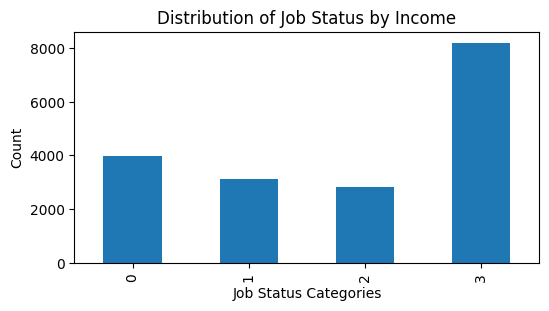

In [63]:
# Check the distribution of the target column 'Job_Status_Income' to assess balance
job_status_income_distribution = df['Job_Status_Income(Objective1)'].value_counts()

# Sort the distribution to ensure the categories are in the correct order (0, 1, 2, 3)
job_status_income_distribution = job_status_income_distribution.sort_index()

# Display the distribution
print(job_status_income_distribution)

# Set the figure size (width, height) in inches, for a smaller plot
plt.figure(figsize=(6, 3))

# Plot the distribution
job_status_income_distribution.plot(kind='bar')

# Adding labels and title to the plot
plt.title('Distribution of Job Status by Income')
plt.xlabel('Job Status Categories')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])

# Show the plot
plt.show()

<b>Insights</b>

We have four distinct classes in the target column:

0. Employed with high income (3,966 instances)
1. Employed with low income (3,129 instances)
2. Unemployed with income (2,837 instances)
3. Unemployed with no income (8,192 instances)

<b>Given this distribution, our strategy to handle the imbalance is as follows:</b>

- <font color='darkblue'><b>Classes 0, 1 and 2 have relatively similar counts (3966, 3129 and 2837 respectively)</b></font>, so no oversampling or undersampling is required for these groups.
- <font color='darkblue'><b>Class 3 (Unemployed with no income) has a significantly higher count (8,192 instances) compared to the other classes</b></font>. To address this, we will apply undersampling to reduce the number of samples in class 3 to 3,966, which matches the largest group among the employed categories (class 0). This will allow us to retain as many records as possible while ensuring better balance in the data.

<b>Summary of Actions:</b>
- <font color='darkblue'><b>Undersampling</b></font>: Applied to class 3 (Unemployed with no income) to reduce its count to 3,966.
- <font color='darkblue'><b>No resampling</b></font>: For classes 0, 1 and 2, as they are relatively balanced already.


To implement SMOTE, we will drop the categorical columns. However, the information from these columns is retained through the one-hot encoding and ordinal encoding we performed earlier in the Feature Engineering section.

In [64]:
# List of columns to drop
columns_to_drop = [
    'Intuition',
    'Highest_Degree',
    'Field_Working',
    'Study_Field'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [65]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assuming df is your dataset and 'Job_Status_Income' is the target column
X = df.drop('Job_Status_Income(Objective1)', axis=1)  # Features
y = df['Job_Status_Income(Objective1)']  # Target

# Impute missing values with the median (you can also choose mean or another strategy)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Display original class distribution
print("Original class distribution:", Counter(y))

# Apply SMOTE to class 2 (Unemployed with income) to synthetically increase to 3129 instances
#smote = SMOTE(sampling_strategy={2: 3129}, random_state=42)
#X_smote, y_smote = smote.fit_resample(X_imputed, y)

# Apply undersampling to class 3 (Unemployed with no income) to reduce to 3966 instances
undersample = RandomUnderSampler(sampling_strategy={3: 3966}, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_imputed, y)

# Display the new class distribution
print("New class distribution after SMOTE and undersampling:", Counter(y_resampled))

# Optionally, combine X_resampled and y_resampled back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=df.drop('Job_Status_Income(Objective1)', axis=1).columns)
df_resampled['Job_Status_Income(Objective1)'] = y_resampled

Original class distribution: Counter({3: 8192, 0: 3966, 1: 3129, 2: 2837})
New class distribution after SMOTE and undersampling: Counter({0: 3966, 3: 3966, 1: 3129, 2: 2837})


Job_Status_Income(Objective1)
0    3966
1    3129
2    2837
3    3966
Name: count, dtype: int64


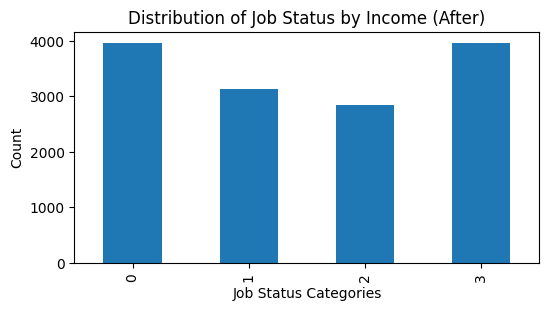

In [66]:
# Check the distribution of the target column 'Job_Status_Income' to assess balance
job_status_income_distribution = df_resampled['Job_Status_Income(Objective1)'].value_counts()

# Sort the distribution to ensure the categories are in the correct order (0, 1, 2, 3)
job_status_income_distribution = job_status_income_distribution.sort_index()

# Display the distribution
print(job_status_income_distribution)

# Set the figure size (width, height) in inches, for a smaller plot
plt.figure(figsize=(6, 3))

# Plot the distribution
job_status_income_distribution.plot(kind='bar')

# Adding labels and title to the plot
plt.title('Distribution of Job Status by Income (After)')
plt.xlabel('Job Status Categories')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])

# Show the plot
plt.show()

Job_Status_Expecation(Objective2)
0.0    5555
1.0    2107
2.0    3525
3.0    2711
Name: count, dtype: int64


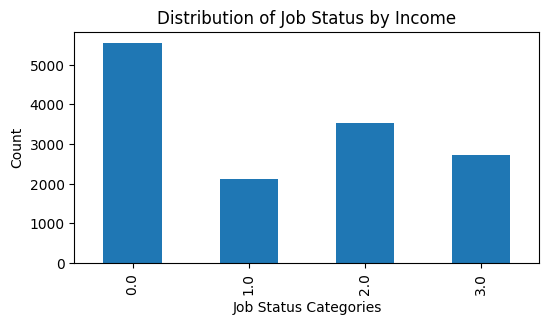

In [67]:
# Check the distribution of the target column 'Job_Status_Expectation' to assess balance
job_status_expectation_distribution = df_resampled['Job_Status_Expecation(Objective2)'].value_counts()

# Sort the distribution to ensure the categories are in the correct order (0, 1, 2, 3)
job_status_expectation_distribution = job_status_expectation_distribution.sort_index()

# Display the distribution
print(job_status_expectation_distribution)

# Set the figure size (width, height) in inches, for a smaller plot
plt.figure(figsize=(6, 3))

# Plot the distribution
job_status_expectation_distribution.plot(kind='bar')

# Adding labels and title to the plot
plt.title('Distribution of Job Status by Income')
plt.xlabel('Job Status Categories')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])

# Show the plot
plt.show()

<b>Insights</b>

We have four distinct classes in the target column:

0. Employed_High_Expectation (5555 instances)
1. Employed_Low_Expectation (2107 instances)
2. Unemployed_High_Expectation (3525 instances)
3. Unemployed_Low_Expectation (2711 instances)

<b>Given this distribution, we would not do any strategy to re-balance the dataset. The reasons are as follows:</b>

- <font color='darkblue'><b>Natural Balance in Classes</b></font>: When examining the class distribution, you can see that categories 1 (Employed with Low Expectation), 2 (Unemployed with High Expectation), and 3 (Unemployed with Low Expectation) are relatively balanced already. The differences between these counts are not so significant that they would drastically affect the model's ability to learn patterns from the data. Hence, resampling for these classes may not provide substantial benefits and could even introduce unnecessary complexity.
- <font color='darkblue'><b>Personal Opinions or Aspirations for Expectation</b></font>:The target column includes categories like High Expectation and Low Expectation, which are inherently based on personal opinions or aspirations. These are not objective or factual measures, such as income or employment status. Synthetic resampling techniques like SMOTE are designed for objective, numerical data but may not be suitable for subjective fields where personal attitudes or feelings come into play.

<font color='darkblue'><b>To avoid any impact due to the imbalance</b></font>, we could also <font color='darkblue'><b>leverage Class Weighting</b></font>. Many machine learning algorithms (e.g., Random Forest, Logistic Regression, SVM) offer options to handle class imbalance through class weights. These algorithms can be configured to give more importance to underrepresented classes without the need for resampling. This approach allows you to maintain the original data while ensuring that the model gives attention to minority classes.


After resampling, we will need to revisit and correct the columns type again.

### **Finally**

We will export our prepared dataset for further model prediction tasks. <font color='darkblue'><b>The final dataset will be saved as df_final.</font></b>

<b>The final data will also be directly uploaded to the GitHub repository.</b>

In [68]:
df_final = df_resampled

# Save the final dataset as a CSV file
df_final.to_csv('df_final.csv', index=False)

# Download the CSV file to the local machine
from google.colab import files

# Download the saved CSV file
files.download('df_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>